In [1]:
 !pip install matplotlib==3.5.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 55.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


aaa:



# Import libraries.


In [2]:
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
# from matplotlib.pyplot.bar_label
import seaborn as sns;
#import optuna
from scipy import stats
import glob
import random
import datetime
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import os
import pickle
# from  datasist.structdata import detect_outliers
from tqdm import tqdm
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(rc={'figure.figsize':[7,7]},font_scale=1.2)
from datetime import date,timedelta
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Pre Processing
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
# Error Metrics 
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


#classefication
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import plot_confusion_matrix
#clustring 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#hyper parameter tunning
from sklearn.model_selection import GridSearchCV
#pca
from sklearn.decomposition import PCA
#clustring
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:

class Recomender:
    def __init__(self, name ,matrix):
           self.name   = name
           self.matrix = matrix
    def getRecomendationBasedOnSimilarUsers (self):
        #this below stebs 
        similarity = self.matrix.corrwith(self.matrix[self.name])
        corrlated_movies=similarity.reset_index().rename(columns={0:'corrolation'}).sort_values(by='corrolation',ascending=False)
        corrlated_movies.dropna(inplace=True)
        df3 = final.groupby(['title','item_id']).agg({'rating':'mean','total_rate_count':'count'}).reset_index().rename(columns={'rating':'average_rating'})
        recomended  = pd.merge(df3,corrlated_movies,on='title')
        recomended  = recomended.sort_values(by='corrolation',ascending=False)[1:11]   
        return dict(zip(recomended['item_id'], recomended['title']))

In [4]:
seed = 42
np.random.seed =seed

#  📌Helper Function ⚒





In [5]:
#convert data frame to slower case
def lowerCase(x):
    return x.lower()

#check duplicate data 
def check_duplicate(df):
    if df.duplicated().all():
        return  'There are duplicate Data in Data Frame Nedded To be  removed . ' 
    else :
        return 'Data Is clean ,No Duplicate Data Found .'

def get_item_id(x):
    itemname  = df[df['title']==x]
    return itemname['item_id']

# def car_model(x):
#     y   = x.split(' ')[1:]
#     carModel = ' '.join(y)
#     return  carModel 
            
# def getfreq(x):
#     freq = x.split(' ')[-1]
#     return freq

def calc_day_of_birth (day_num):
    today = date.today() 
    birthDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    return birthDay
    
def calc_day_of_employed(day_num):
    today = date.today() 
    employedDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    result = 0
    if employedDay > date.today().strftime('%Y-%m-%d') :
         result = 0
    else:
         result = employedDay
    return result

def calculate_age(born):
    born = datetime.datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    
    
def get_appartment(x):
    if x == 'House / apartment' :
       x= x.split(' /')[0]       
    return x
    
def get_ducational_type(x):
    if x == 'Secondary / secondary special' :
       x= x.split(' /')[0]       
    return x

def get_label_for_data(x):
    target = ''
    if x in (2,3,4,5) :
       target = 'YES' #risky
    else:
         target = 'NO'  #not risky

    return target
    #draw distplot for all numeric columns just pass numerical column
def all_distplot (numCol):
    plt.figure(1 , figsize = (20 , 6))
    n = 0 
    for x in numCol:
        n += 1
        plt.subplot(1 , len(numCol) , n)
        plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
        sns.distplot(df[x] , bins = 20)
        plt.title('Distplot of {}'.format(x))
    plt.show()    
     
def box_plot(df):
    i=1
    plt.figure(figsize = (20,50))
    for col in df.columns:
        plt.subplot(round(len(df.columns)/3),3,i)
        sns.boxplot(x = df[col], data = df,width = 0.5, fliersize = 3, linewidth = 1)
        i+=1       

def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()   

def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,5))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

def plot_feature_importance (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.coef_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()
def plot_feature_importance_2 (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.feature_importances_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()

def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x=col_x, y = col_y, data=df, color='#0d98ba', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept
def average_plotting(df,col,output,number,title):
    data_list = df[col].value_counts().index[:number].tolist()
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black") 
    plt.xticks(rotation=45);
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()
def draw_unique_value (df,title):
    plt.figure(figsize=(10,5))
    plt.title(title)
    unique_counts = df.nunique().to_dict()
    ax = sns.barplot(list(unique_counts.keys()), list(unique_counts.values()),palette='flare')
    ax.bar_label(ax.containers[0])
    plt.plot()

#  📌Reading Data

In [6]:
data = pd.read_csv('/kaggle/input/dataset/Dataset.csv')
data.head(10)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
5,22,377,1,878887116
6,244,51,2,880606923
7,166,346,1,886397596
8,298,474,4,884182806
9,115,265,2,881171488


In [7]:
movies = pd.read_csv('/kaggle/input/dataset/Movie_Id_Titles.csv')
movies.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


<h4 id="1.2-|-dataset shape"><b>1.1<span style="color:#4a8fdd">|</span> dataset shape</b></h4>





In [8]:
print("The number of rows in  Main Dataset is {} , \nThe number of columns in  data is {}".format(data.shape[0], data.shape[1]))
print("The number of rows in  movies data is {} , \nThe number of columns in  data is {}".format(movies.shape[0], movies.shape[1])) 

The number of rows in  Main Dataset is 100003 , 
The number of columns in  data is 4
The number of rows in  movies data is 1682 , 
The number of columns in  data is 2


# 📌Data Cleaning

*   check column type.
*   drop un necessary column.
*   check duplicate data 
*   check  missing value.
*   dealing with missing value



<h4 id="2.1-|-dataset information"><b>2.1<span style="color:#4a8fdd">|</span> dataset information</b></h4>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [11]:
#get numerical column
numCol  = [col for col in data.columns if  data[col].dtype != "O"]
numCol

['user_id', 'item_id', 'rating', 'timestamp']

In [12]:
#get categorical column
catColumn  = [col for col in data.columns if  data[col].dtype == "O"]
catColumn

[]

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100003.0,4.624709e+02,2.666225e+02,0.0,254.0,447.0,682.0,943.0
item_id,100003.0,4.255209e+02,3.307978e+02,1.0,175.0,322.0,631.0,1682.0
rating,100003.0,3.529864e+00,1.125704e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100003.0,8.835288e+08,5.343791e+06,874724710.0,879448715.0,882826944.0,888259984.0,893286638.0


<h4 id="2.3-|-dataset statistics"><b>2.3 <span style="color:#4a8fdd">|</span> dataset statistics</b></h4>




In [14]:
#check duplicate data 
check_duplicate(data)

'Data Is clean ,No Duplicate Data Found .'

In [15]:
# check missing Value
data.isnull().sum().sort_values(ascending=False)

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

<AxesSubplot:>

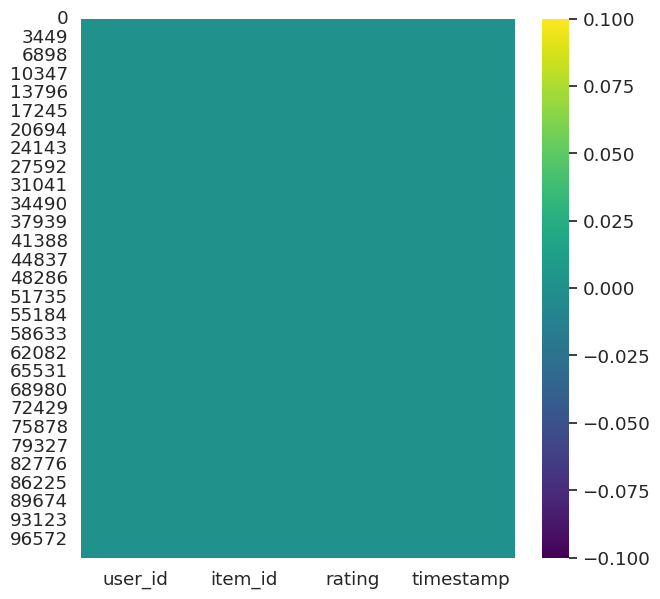

In [16]:
cols =data.columns
sns.heatmap(data[cols].isnull(), cmap='viridis')

In [17]:
data.shape

(100003, 4)

In [18]:
movies.shape

(1682, 2)

In [19]:
#mergind data tables
df = pd.merge(data,movies,on='item_id')
df.reset_index(inplace = True)

<div class="text_cell_render border-box-sizing rendered_html">
<div style="border-radius: 10px;
            border : black solid;
            background-color: #34baeb;
            font-size:110%;
            text-align: left">

<h3 style="; border:0; border-radius: 10px; font-weight: bold; color:black"><center> Dataset Basic Informations</center></h3>
<p>● Frist dataset consists of 100003 rows and 4 columns. </p>
 <p>●Second  The dataset consists of 1682 rows and 2columns. </p>
<p>● There is Null data through 1 column and i will drop it .</p>
<p>● No duplicate data in dataset .</p>

</div>
</div>

# 📌Data Analaysis & Visualization
in this part we will analays and versialize each part of data to be in near step from our goal then pased on deployed models we will sense best factior that affect on our bussiness goal



<h4 id="3.3-|- distplot for neumerical data"><b>3.3 <span style="color:#4a8fdd">|</span> distplot for neumerical data</b></h4>



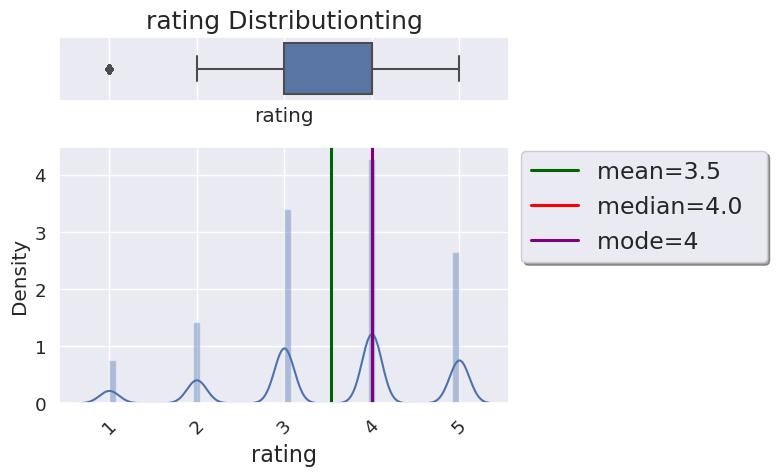

In [20]:
numerical_plotting(df,'rating','rating Distributionting','  ')

In [21]:
df.describe()[['rating']].T

,count,mean,std,min,25%,50%,75%,max
rating,100003.0,3.529864,1.125704,1.0,3.0,4.0,4.0,5.0



<h4 id="3.4-|- Histogram"><b>3.4 <span style="color:#4a8fdd">|</span>    Histogram </b></h4>


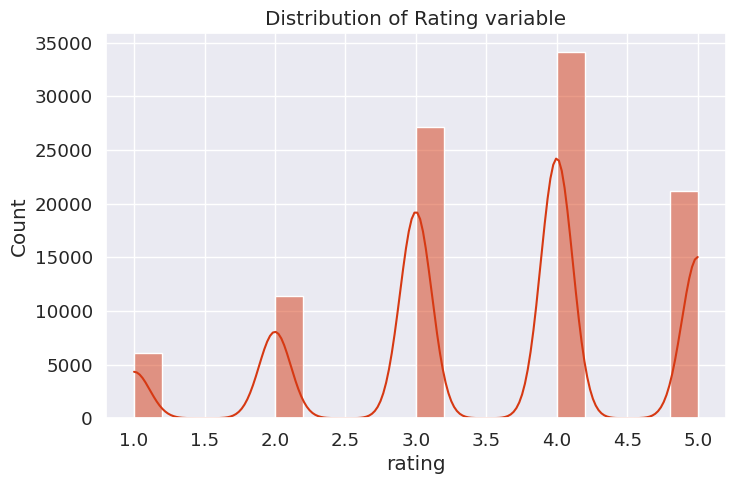

In [22]:
plt.figure(figsize=(8,5))
sns.histplot( x = df["rating"], bins = 20, kde = True, color = "#D63913").set(title = "Distribution of Rating variable");

<div class="text_cell_render border-box-sizing rendered_html">
<div style="border-radius: 10px;
            border : black solid;
            background-color: #34baeb;
            font-size:110%;
            text-align: left">

<h3 style="; border:0; border-radius: 10px; font-weight: bold; color:black"><center> Basic Numeric analaysis</center></h3>
<p>● Data is not Normaly Distributed</p>
<p>● Skeynees detected (left&right)</p>
</div>
</div>

<h4 id="3.5-|- Histogram"><b>3.5 <span style="color:#4a8fdd">|</span>    Box Blot </b></h4>

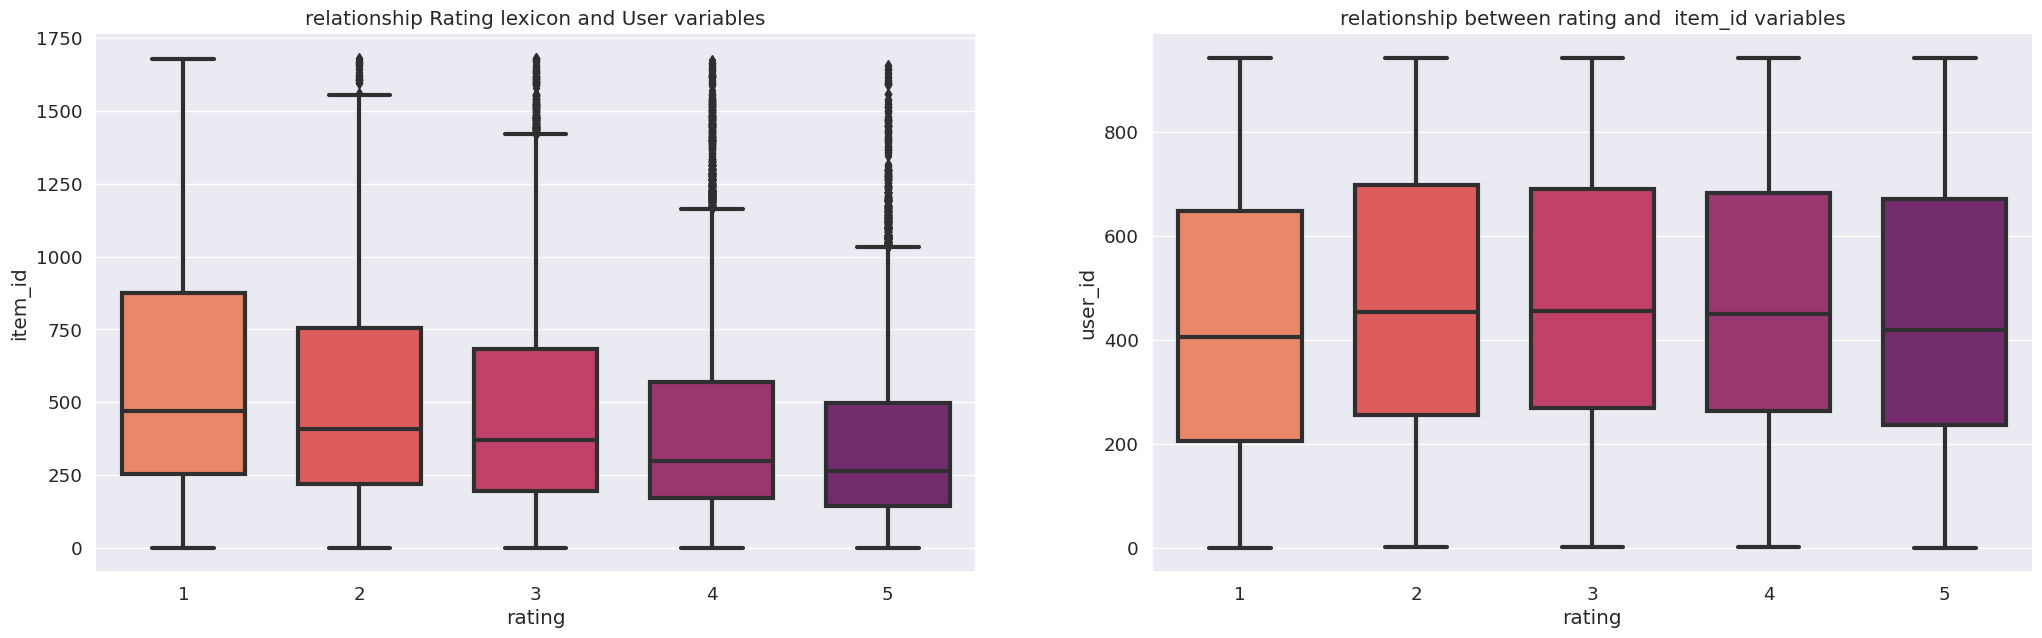

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (25, 7))
sns.boxplot(ax = axes[0], x = "rating", y = "item_id", data = df, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare');
axes[1].set_title("relationship between rating and  item_id variables");

sns.boxplot(ax = axes[1], x = "rating", y = "user_id", data = df, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare')
axes[0].set_title("relationship Rating lexicon and User variables");  


<h4 id="3.6-|- sactter Plot"><b>3.6 <span style="color:#4a8fdd">|</span>  sactter Plot</b></h4>

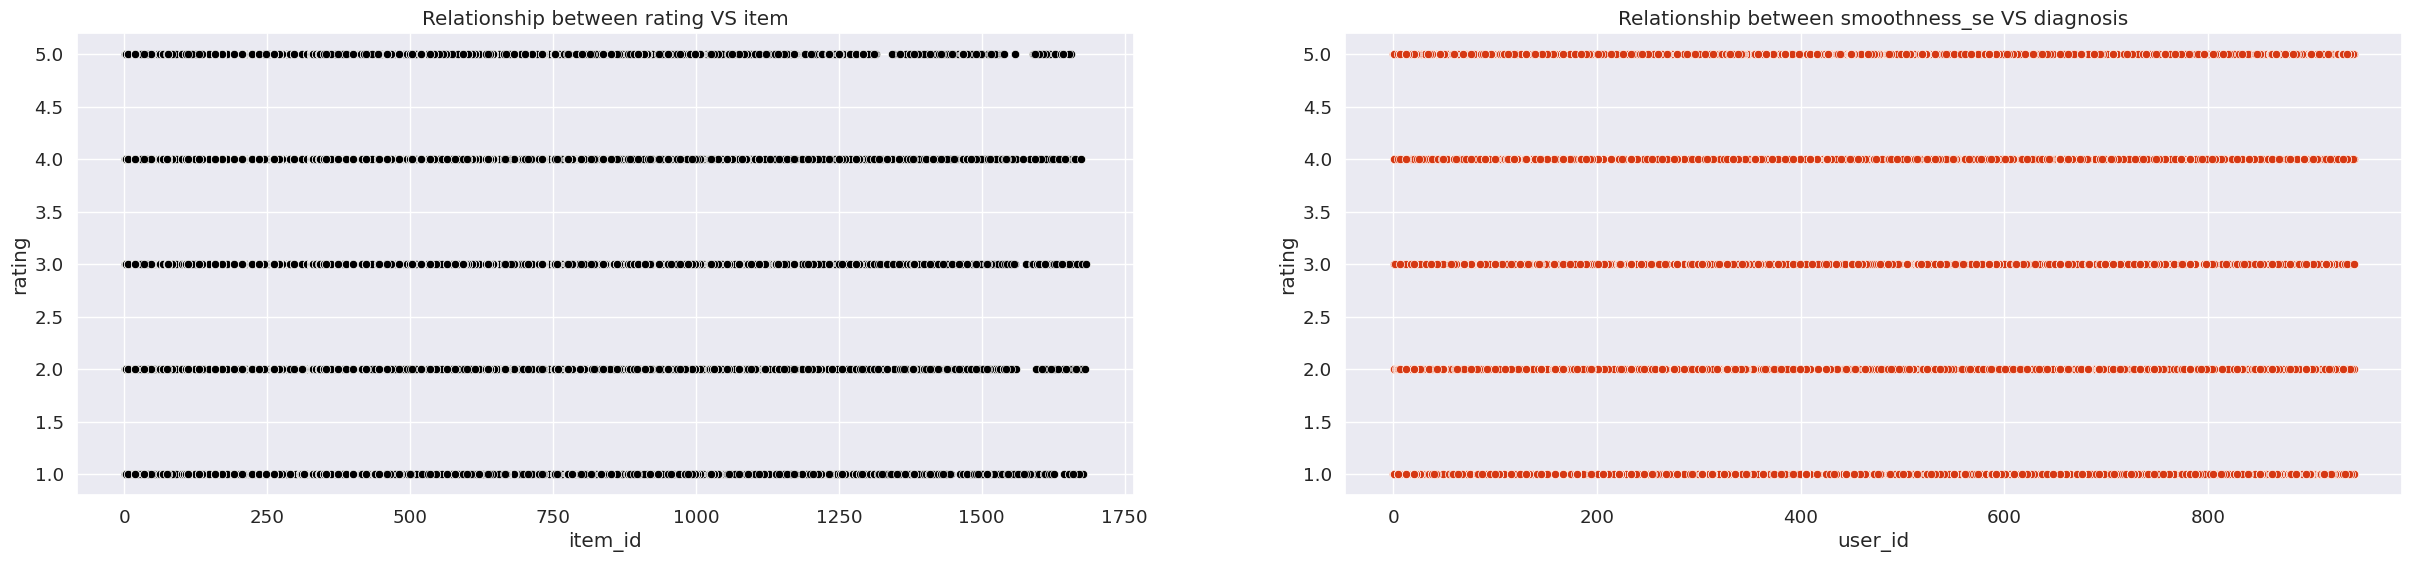

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (30, 6))
axes = axes.flatten()
sns.scatterplot(ax = axes[0], x = "item_id", y = "rating", data = df, color = "#000000"
                ).set(title = "Relationship between rating VS item");

sns.scatterplot(ax = axes[1], x = "user_id", y = "rating", data = df,
                color = "#D63913").set(title = "Relationship between smoothness_se VS diagnosis");



<h4 id="3.9-|- pi Plot"><b>3.9 <span style="color:#4a8fdd">|</span>  pi Plot </b></h4>

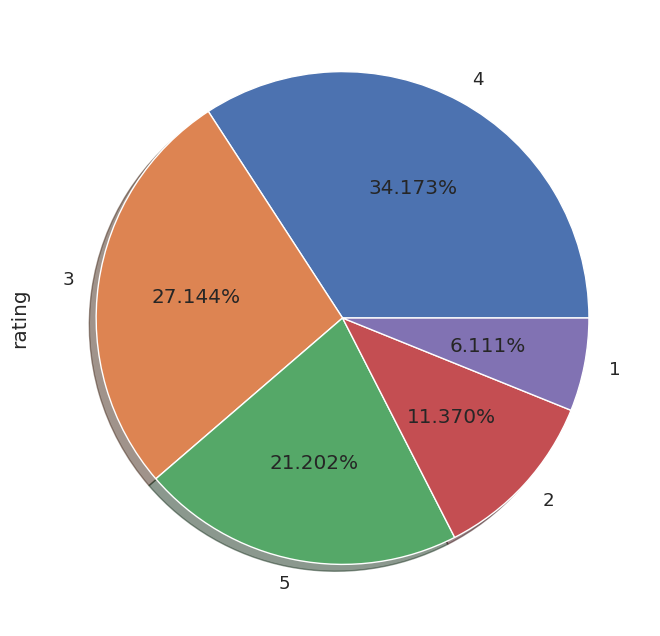

In [25]:
plt.figure(figsize = [8, 8], clear = True, )
df["rating"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);

In [26]:
df['rating'].value_counts()

4    34174
3    27145
5    21203
2    11370
1     6111
Name: rating, dtype: int64

In [27]:
df['item_id'].value_counts()

50      584
258     509
100     508
181     507
294     485
       ... 
852       1
1505      1
1653      1
1452      1
1641      1
Name: item_id, Length: 1682, dtype: int64


<h4 id="3.10-|- pair Plot"><b>3.10 <span style="color:#4a8fdd">|</span>  pair Plot </b></h4>

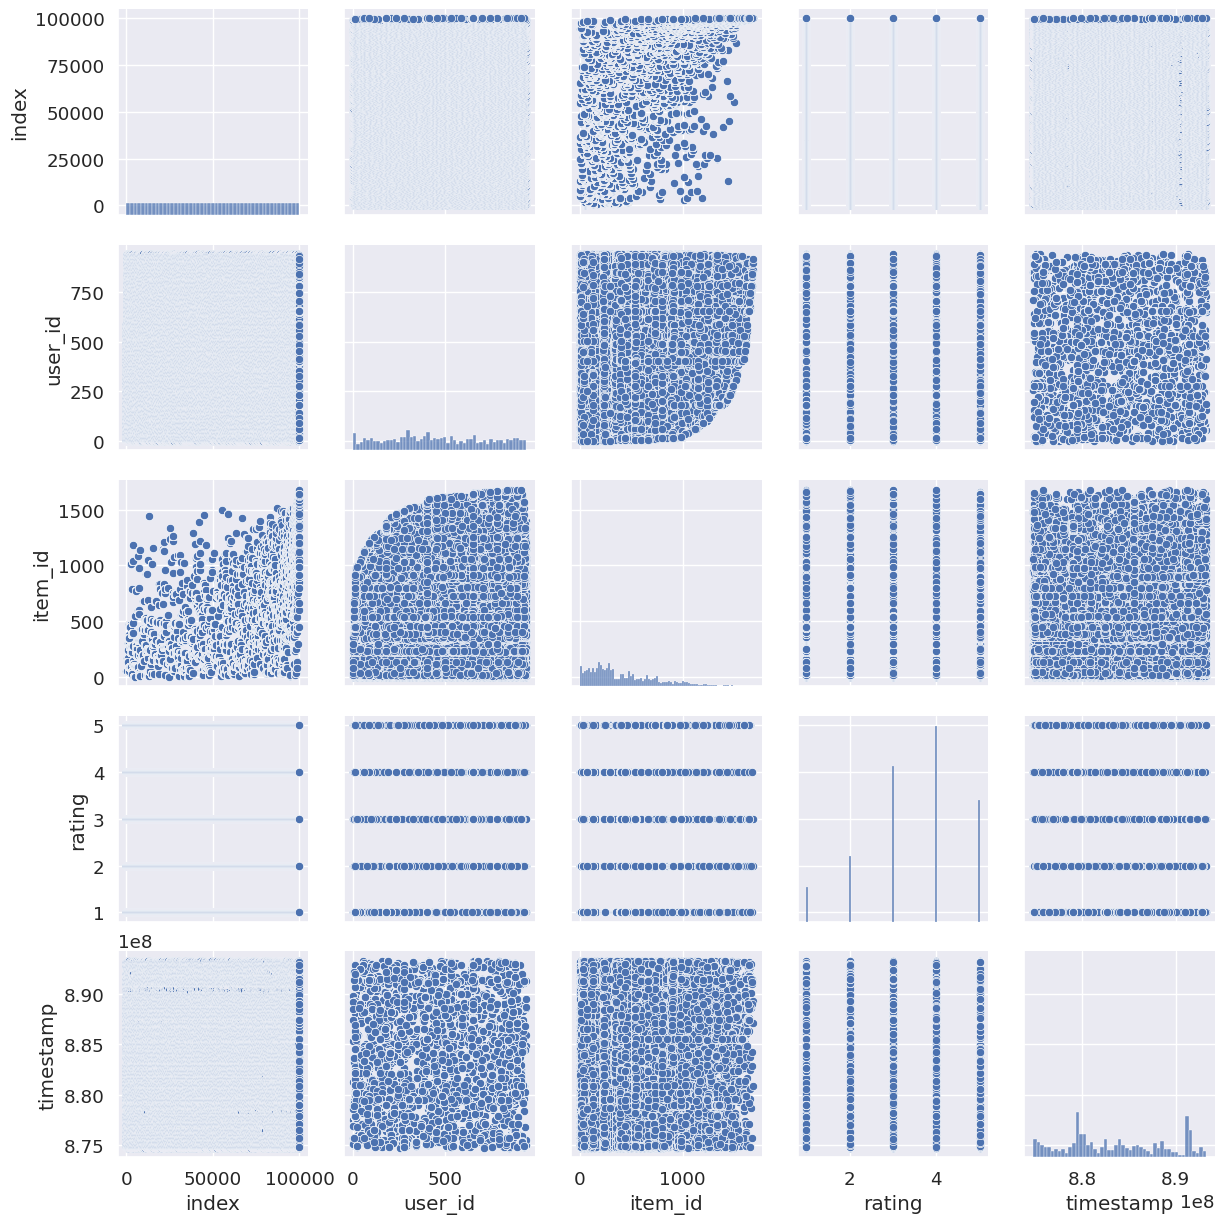

In [28]:
sns.pairplot(df)

In [29]:
df.corr()

,index,user_id,item_id,rating,timestamp
index,1.000000,-0.002668,0.439350,-0.150458,0.040541
user_id,-0.002668,1.000000,0.010425,-0.009377,0.019103
item_id,0.439350,0.010425,1.000000,-0.189119,0.041878
rating,-0.150458,-0.009377,-0.189119,1.000000,-0.012004
timestamp,0.040541,0.019103,0.041878,-0.012004,1.000000


<AxesSubplot:>

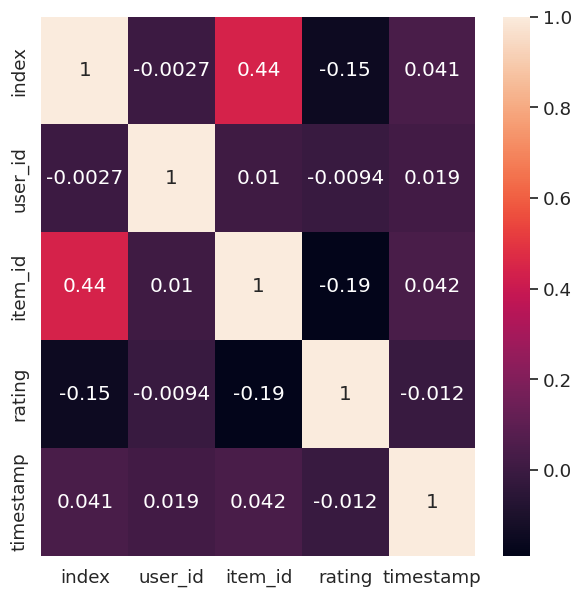

In [30]:
sns.heatmap(df.corr(),annot=True)


<div class="text_cell_render border-box-sizing rendered_html">
<div style="border-radius: 10px;
            border : black solid;
            background-color: #34baeb;
            font-size:110%;
            text-align: left">

<h3 style="; border:0; border-radius: 10px; font-weight: bold; color:black"><center>Big Attention</center></h3>
<p>●  NO Multicollinearity   is detected </p>
<p>●  
 in this dataset ther are good coloration value between more of features even it +ve or -ve  and  no need Break it (Normal Values)</p>

</div>
</div>





In [31]:
##############################################################################old code################################

In [32]:
max_count_rate = df.groupby('title')['rating'].count().reset_index().rename(columns={'rating':'total_rate_count'})
max_count_rate

,title,total_rate_count
0,'Til There Was You (1997),9
1,1-900 (1994),5
2,101 Dalmatians (1996),109
3,12 Angry Men (1957),125
4,187 (1997),41
...,...,...
1659,Young Guns II (1990),44
1660,"Young Poisoner's Handbook, The (1995)",41
1661,Zeus and Roxanne (1997),6
1662,unknown,9


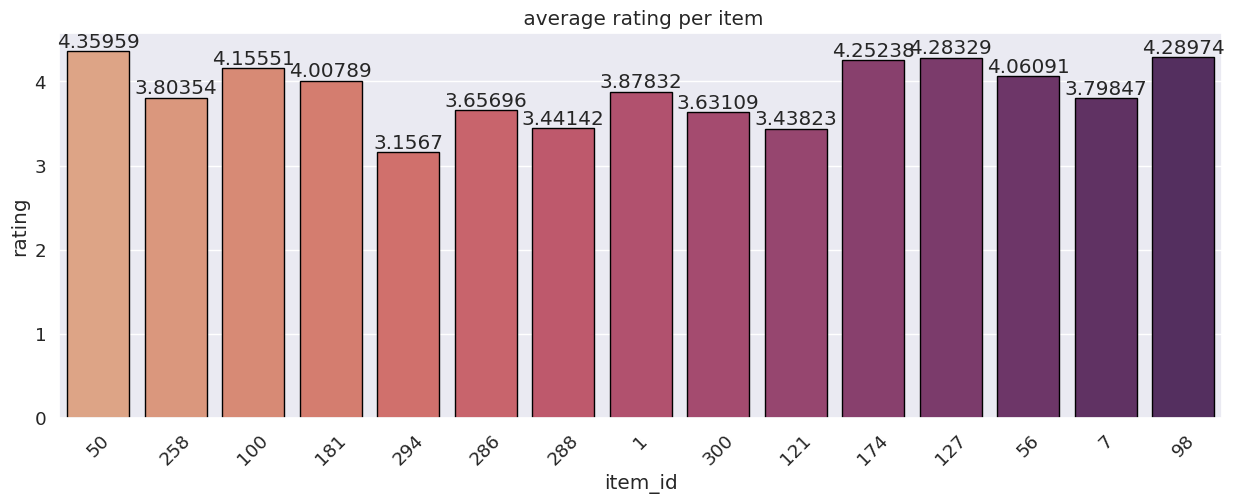

In [33]:
average_plotting(df,'item_id','rating',15,' average rating per item')

In [34]:
df2 = pd.merge(df,max_count_rate,on='title')
df2

,index,user_id,item_id,rating,timestamp,title,total_rate_count
0,0,0,50,5,881250949,Star Wars (1977),584
1,1,290,50,5,880473582,Star Wars (1977),584
2,2,79,50,4,891271545,Star Wars (1977),584
3,3,2,50,5,888552084,Star Wars (1977),584
4,4,8,50,5,879362124,Star Wars (1977),584
...,...,...,...,...,...,...,...
99998,99998,840,1674,4,891211682,Mamma Roma (1962),1
99999,99999,655,1640,3,888474646,"Eighth Day, The (1996)",1
100000,100000,655,1637,3,888984255,Girls Town (1996),1
100001,100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1...",1


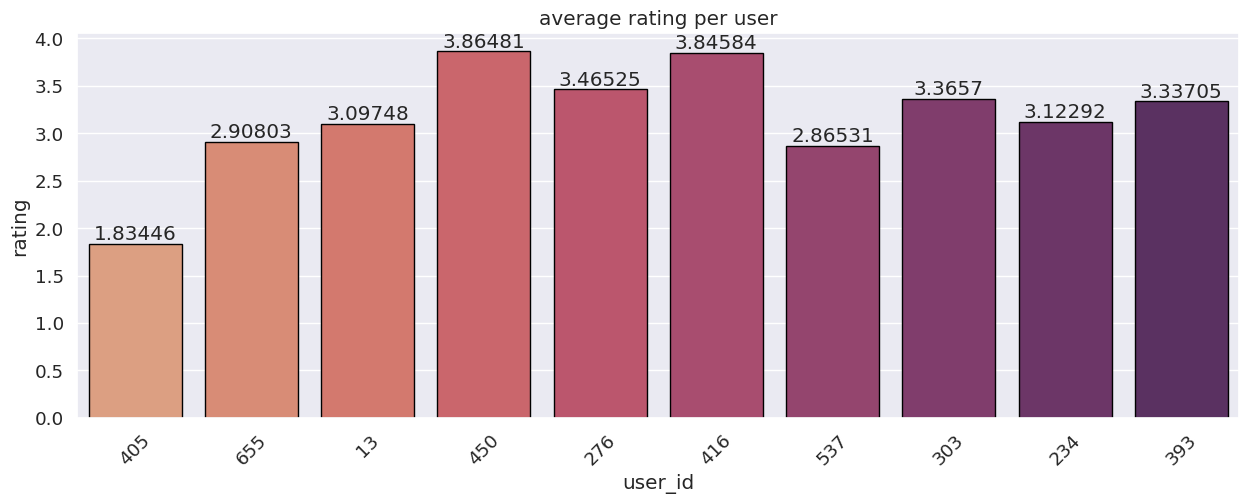

In [35]:
average_plotting(df,'user_id','rating',10,'average rating per user')

#  📌 Collaborative  Recomender System (based on similar User rating ) 

<AxesSubplot:xlabel='total_rate_count'>

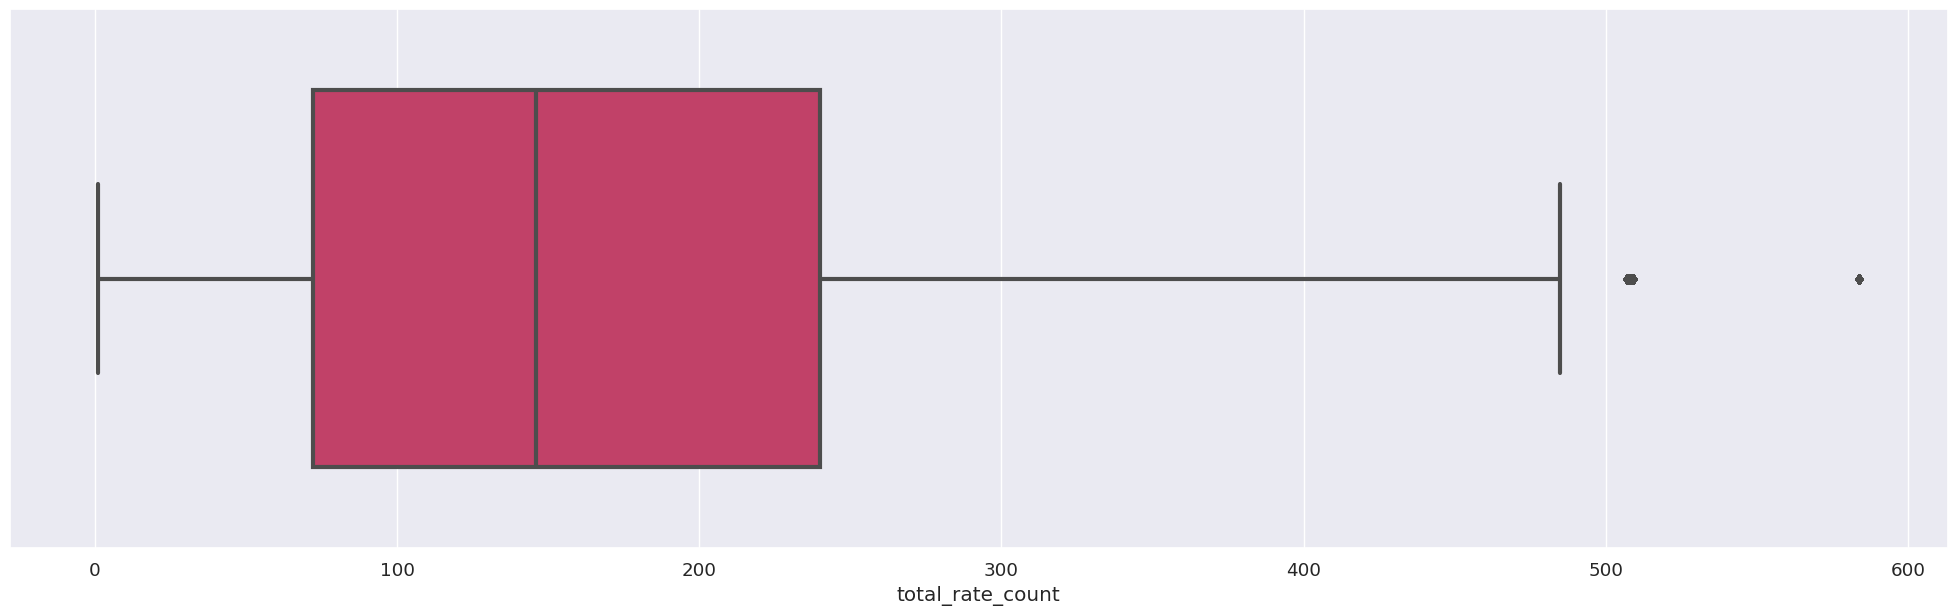

In [36]:
fig, axes = plt.subplots(1, 1, figsize = (25, 7))
sns.boxplot( x = "total_rate_count",  data = df2, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare')


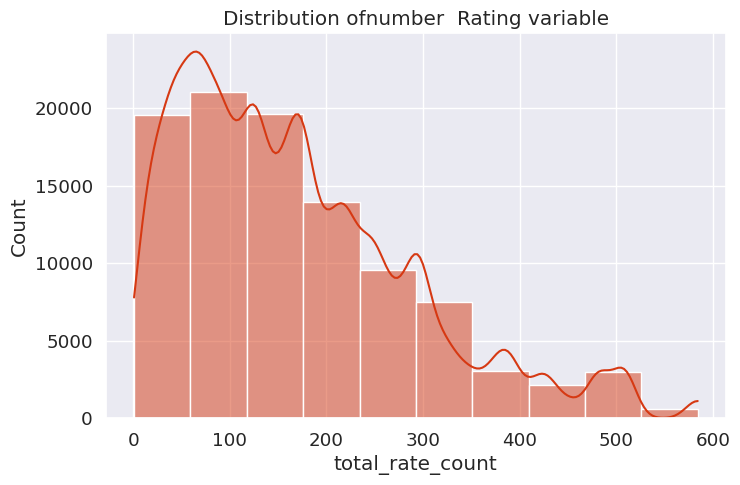

In [37]:
plt.figure(figsize=(8,5))
sns.histplot( x = df2["total_rate_count"], bins = 10, kde = True, color = "#D63913").set(title = "Distribution ofnumber  Rating variable");

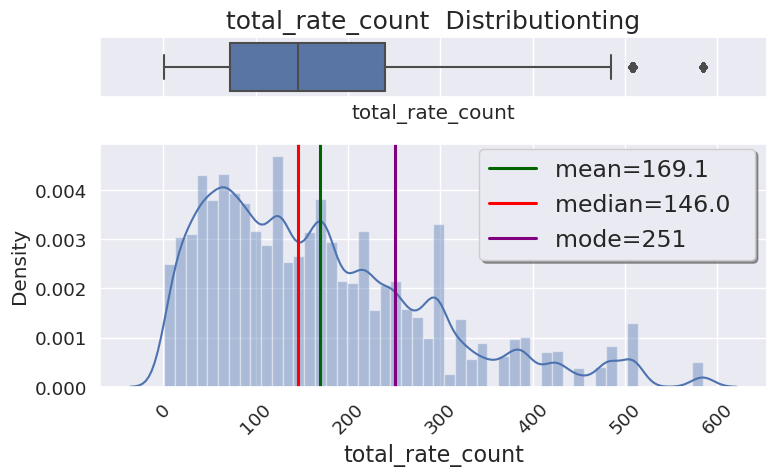

In [38]:
numerical_plotting(df2,'total_rate_count','total_rate_count  Distributionting','  ')

In [39]:
#start to define threshold value for filltering
for i in range(0,101,10):
    print('{}th the Percentail value is {}'.format(i,df2['total_rate_count'].quantile(i/100)))


0th the Percentail value is 1.0
10th the Percentail value is 35.0
20th the Percentail value is 62.0
30th the Percentail value is 86.0
40th the Percentail value is 116.0
50th the Percentail value is 146.0
60th the Percentail value is 175.0
70th the Percentail value is 218.0
80th the Percentail value is 264.0
90th the Percentail value is 336.0
100th the Percentail value is 584.0


In [40]:
threshold= 116
final = df2.query('total_rate_count >=@threshold')
final

,index,user_id,item_id,rating,timestamp,title,total_rate_count
0,0,0,50,5,881250949,Star Wars (1977),584
1,1,290,50,5,880473582,Star Wars (1977),584
2,2,79,50,4,891271545,Star Wars (1977),584
3,3,2,50,5,888552084,Star Wars (1977),584
4,4,8,50,5,879362124,Star Wars (1977),584
...,...,...,...,...,...,...,...
93509,93442,820,358,1,887954972,Spawn (1997),143
93510,93443,397,358,2,882838937,Spawn (1997),143
93511,93444,827,358,2,882808622,Spawn (1997),143
93512,93445,757,358,3,888443570,Spawn (1997),143


In [41]:
pivote_movies= final.pivot_table(index='user_id',values='rating',columns='title')
pivote_movies

title,12 Angry Men (1957),2001: A Space Odyssey (1968),Absolute Power (1997),"Abyss, The (1989)","African Queen, The (1951)",Air Force One (1997),Aladdin (1992),Alien (1979),Alien: Resurrection (1997),Aliens (1986),...,"Usual Suspects, The (1995)",Vertigo (1958),Volcano (1997),Wag the Dog (1997),When Harry Met Sally... (1989),While You Were Sleeping (1995),Willy Wonka and the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wrong Trousers, The (1993)",Young Frankenstein (1974)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,4.0,NaN,3.0,NaN,NaN,4.0,5.0,NaN,5.0,...,5.0,NaN,NaN,NaN,5.0,4.0,4.0,4.0,5.0,5.0
2,NaN,NaN,3.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,5.0,5.0,3.0,2.0,4.0,...,4.0,NaN,4.0,3.0,4.0,4.0,3.0,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#get corrolated movies
similarity = pivote_movies.corrwith(pivote_movies['Star Wars (1977)'])
corrlated_movies=similarity.reset_index().rename(columns={0:'corrolation'}).sort_values(by='corrolation',ascending=False)
corrlated_movies.dropna(inplace=True)
corrlated_movies

,title,corrolation
258,Star Wars (1977),1.000000
83,"Empire Strikes Back, The (1980)",0.748353
221,Return of the Jedi (1983),0.672556
213,Raiders of the Lost Ark (1981),0.536117
18,Austin Powers: International Man of Mystery (1...,0.377433
...,...,...
219,"Remains of the Day, The (1993)",-0.112067
153,Kiss the Girls (1997),-0.122186
61,Crash (1996),-0.148507
106,G.I. Jane (1997),-0.176734


In [43]:
df3 = final.groupby(['title','item_id']).agg({'rating':'mean','total_rate_count':'count'}).reset_index().rename(columns={'rating':'average_rating'})
df3

,title,item_id,average_rating,total_rate_count
0,12 Angry Men (1957),178,4.344000,125
1,2001: A Space Odyssey (1968),135,3.969112,259
2,Absolute Power (1997),291,3.370079,127
3,"Abyss, The (1989)",164,3.589404,151
4,"African Queen, The (1951)",498,4.184211,152
...,...,...,...,...
291,While You Were Sleeping (1995),66,3.549383,162
292,Willy Wonka and the Chocolate Factory (1971),151,3.631902,326
293,"Wizard of Oz, The (1939)",132,4.077236,246
294,"Wrong Trousers, The (1993)",169,4.466102,118


In [44]:
recomended  = pd.merge(df3,corrlated_movies,on='title')
recomended  = recomended.sort_values(by='corrolation',ascending=False)[1:11]
recomended  =dict(zip(recomended['item_id'], recomended['title']))
recomended

{172: 'Empire Strikes Back, The (1980)',
 181: 'Return of the Jedi (1983)',
 174: 'Raiders of the Lost Ark (1981)',
 249: 'Austin Powers: International Man of Mystery (1997)',
 194: 'Sting, The (1973)',
 210: 'Indiana Jones and the Last Crusade (1989)',
 302: 'L.A. Confidential (1997)',
 347: 'Wag the Dog (1997)',
 501: 'Dumbo (1941)',
 199: 'Bridge on the River Kwai, The (1957)'}

In [45]:
film_1 = Recomender('Star Wars (1977)',pivote_movies)   
film_1.getRecomendationBasedOnSimilarUsers()

{172: 'Empire Strikes Back, The (1980)',
 181: 'Return of the Jedi (1983)',
 174: 'Raiders of the Lost Ark (1981)',
 249: 'Austin Powers: International Man of Mystery (1997)',
 194: 'Sting, The (1973)',
 210: 'Indiana Jones and the Last Crusade (1989)',
 302: 'L.A. Confidential (1997)',
 347: 'Wag the Dog (1997)',
 501: 'Dumbo (1941)',
 199: 'Bridge on the River Kwai, The (1957)'}

In [46]:
film_2 = Recomender('Titanic (1997)',pivote_movies)   
film_2.getRecomendationBasedOnSimilarUsers()

{281: 'River Wild, The (1994)',
 164: 'Abyss, The (1989)',
 217: "Bram Stoker's Dracula (1992)",
 385: 'True Lies (1994)',
 241: 'Last of the Mohicans, The (1992)',
 144: 'Die Hard (1988)',
 300: 'Air Force One (1997)',
 82: 'Jurassic Park (1993)',
 380: 'Star Trek: Generations (1994)',
 756: 'Father of the Bride Part II (1995)'}

#  📌 Collaborative  Recomender System (based on similar item rating ) 

In [47]:
final

,index,user_id,item_id,rating,timestamp,title,total_rate_count
0,0,0,50,5,881250949,Star Wars (1977),584
1,1,290,50,5,880473582,Star Wars (1977),584
2,2,79,50,4,891271545,Star Wars (1977),584
3,3,2,50,5,888552084,Star Wars (1977),584
4,4,8,50,5,879362124,Star Wars (1977),584
...,...,...,...,...,...,...,...
93509,93442,820,358,1,887954972,Spawn (1997),143
93510,93443,397,358,2,882838937,Spawn (1997),143
93511,93444,827,358,2,882808622,Spawn (1997),143
93512,93445,757,358,3,888443570,Spawn (1997),143


In [48]:
pivot_table = final.pivot_table(index='title',columns= 'user_id',values='rating').fillna(0)
pivot_table

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,
12 Angry Men (1957),0.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,4.0,0.0,0.0,0.0,4.0,5.0,5.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
Absolute Power (1997),0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
"Abyss, The (1989)",0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
"African Queen, The (1951)",0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
While You Were Sleeping (1995),0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
Willy Wonka and the Chocolate Factory (1971),0.0,4.0,0.0,0.0,0.0,3.0,3.0,4.0,0.0,0.0,...,3.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,4.0
"Wizard of Oz, The (1939)",0.0,4.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [49]:
#convert paivot table to array
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [50]:
pivot_table_array = csr_matrix(pivot_table.values)

In [51]:
model = NearestNeighbors( metric="cosine",algorithm="brute")
model.fit(pivot_table_array)

NearestNeighbors(algorithm='brute', metric='cosine')

In [52]:
pivot_table.shape

(293, 944)

In [53]:
query_index = np.random.choice(pivot_table.shape[0])
query_index

27

In [54]:
pivot_table.index[107]

'Game, The (1997)'

In [55]:
#get recomndation
distance ,indices  = model.kneighbors(pivot_table.iloc[query_index,:].values.reshape(1,-1),n_neighbors=7)


In [56]:
indices

array([[ 27, 162, 232,  92, 204,  54, 233]])

In [57]:
indices.flatten()

array([ 27, 162, 232,  92, 204,  54, 233])

In [58]:
distance

array([[1.44328993e-15, 4.33091076e-01, 4.79774123e-01, 4.79782815e-01,
        4.89103465e-01, 4.94366676e-01, 5.30959675e-01]])

In [59]:
for i in range(0,len(distance.flatten())):
    if i == 0 :
                print('Recommendations for {0}:\n'.format(pivot_table.index[query_index]))
    else:
                print('{0}: {1}, with distance of {2}:'.format(i, pivot_table.index[indices.flatten()[i]], distance.flatten()[i]))
    

Recommendations for Big Night (1996):

1: Lone Star (1996), with distance of 0.4330910760512594:
2: Secrets & Lies (1996), with distance of 0.4797741229096324:
3: Fargo (1996), with distance of 0.4797828152970566:
4: Postino, Il (1994), with distance of 0.4891034647781878:
5: Cold Comfort Farm (1995), with distance of 0.49436667610720963:
6: Sense and Sensibility (1995), with distance of 0.5309596747276261:
